In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("3B.tsv", sep = '\t')

In [ ]:
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts
0,https://www.zomato.com/bangalore/faasos-1-vasa...,Faasos,Yes,No,3.8,101,Vasanth Nagar,Delivery,"North Indian, Biryani, Fast Food",500,Delivery,no,no,no,yes,no,yes,no
1,https://www.zomato.com/bangalore/khanapur-expr...,Khanapur Express,No,No,NaN,0,JP Nagar,Quick Bites,"North Indian, Rajasthani",500,Delivery,no,no,no,yes,no,no,no
2,https://www.zomato.com/bangalore/russh-gastrop...,Russh Gastropub,No,No,4.2,1279,Church Street,Pub,"Continental, Italian, Burger","1,100",Drinks & nightlife,no,no,no,no,no,yes,no
3,https://www.zomato.com/bangalore/bangalir-rann...,Bangalir Rannaghar,No,No,2.9,58,Bannerghatta Road,Quick Bites,"Bengali, North Indian, Chinese",250,Dine-out,no,yes,no,yes,no,no,no
4,https://www.zomato.com/bangalore/natural-mumba...,Natural Mumbai Kulfi,Yes,No,3.5,8,BTM,Dessert Parlor,Ice Cream,130,Delivery,no,no,no,no,no,no,yes


In [ ]:
df.shape

(15000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          15000 non-null  object
 1   name                         15000 non-null  object
 2   online_order                 15000 non-null  object
 3   book_table                   15000 non-null  object
 4   rate                         12736 non-null  object
 5   votes                        15000 non-null  int64 
 6   location                     14992 non-null  object
 7   rest_type                    14931 non-null  object
 8   cuisines                     14988 non-null  object
 9   approx_cost(for two people)  14908 non-null  object
 10  listed_in(type)              15000 non-null  object
 11  sell_beverages               14988 non-null  object
 12  sell_chinese_food            14988 non-null  object
 13  sell_thai_food               14

In [ ]:
df = df.drop('url', axis = 1)

In [ ]:
print(df['name'].unique())

['Faasos' 'Khanapur Express' 'Russh Gastropub' ... 'Fire And Ice'
 'Fai Dang' 'Sri Vasavi Restaurant']


In [ ]:
df['rate'].value_counts()

,count
rate,
NEW,631
3.9,593
3.7,565
3.8,552
3.7,536
...,...
2.1,5
4.9,5
2.2,3


In [ ]:
print(df['rate'].unique())

['3.8' nan '4.2' '2.9' '3.5' '3.5 ' '4.4' '4.3' '4.2 ' '3.6' '2.6' '2.7 '
 '3.1' '3.2 ' '3.6 ' '4.1 ' '3.2' '3.8 ' '4.5' '3.3 ' '4.4 ' '4.6' '4.1'
 '4.0 ' '4.5 ' '3.4' '3.1 ' 'NEW' '3.7' '3.9 ' '3.9' '4.0' '2.4' '3.0'
 '3.7 ' '3.4 ' '2.6 ' '2.8 ' '3.3' '4.3 ' '3.0 ' '4.9 ' '2.8' '2.5 '
 '4.6 ' '2.9 ' '2.7' '-' 'X' '4.7' '2.2 ' '4.8 ' '4.8' '2.1' '4.7 ' '2.3'
 '2.5' '2.3 ' '2.4 ' '2.1 ' '2.0 ' '4.9' '2.2' '1.8 ']


In [ ]:
df['rate'] = df['rate'].replace(["NEW", "-", "X"], np.nan)

In [ ]:
df['rate'] = df['rate'].astype(float)


In [ ]:
df['rate'].isnull().values.sum()

2926

In [ ]:
print('median rate: ',df['rate'].median())

median rate:  3.7


In [ ]:
df['rate'].fillna(3.7, inplace=True)

<ipython-input-124-c913856b384a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(3.7, inplace=True)


In [ ]:
below3 = (df["rate"] < 3).sum()
below3

681

In [ ]:
df['rate'] = df['rate'].where(df['rate'] >= 3, np.nan)

In [ ]:
print(df['rate'].unique())

[3.8 3.7 4.2 nan 3.5 4.4 4.3 3.6 3.1 3.2 4.1 4.5 3.3 4.6 4.  3.4 3.9 3.
 4.9 4.7 4.8]


In [ ]:
df['online_order'].value_counts()

,count
online_order,
Yes,8850
No,6150


In [ ]:
df['book_table'].value_counts()

,count
book_table,
No,13127
Yes,1873


In [ ]:
df['votes'].value_counts()

,count
votes,
0,2907
4,323
7,265
6,263
11,201
...,...
1472,1
2730,1
2861,1


In [ ]:
df['location'].value_counts()

,count
location,
BTM,1483
HSR,759
Koramangala 5th Block,697
JP Nagar,647
Whitefield,619
...,...
North Bangalore,2
West Bangalore,1
Yelahanka,1


In [ ]:
df['rest_type'].value_counts()

,count
rest_type,
Quick Bites,5516
Casual Dining,2967
Cafe,1115
Delivery,781
Dessert Parlor,642
...,...
"Casual Dining, Sweet Shop",1
"Club, Casual Dining",1
"Quick Bites, Mess",1


In [ ]:
df['cuisines'].value_counts()

,count
cuisines,
North Indian,863
"North Indian, Chinese",682
South Indian,514
Biryani,248
"Bakery, Desserts",244
...,...
"Beverages, Sandwich, Chinese",1
"Asian, Chinese, Japanese, BBQ",1
"Rolls, Fast Food, Beverages, Desserts",1


In [ ]:
df['listed_in(type)'].value_counts()

,count
listed_in(type),
Delivery,7527
Dine-out,5210
Desserts,998
Cafes,517
Drinks & nightlife,300
Buffet,246
Pubs and bars,202


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         15000 non-null  object 
 1   online_order                 15000 non-null  object 
 2   book_table                   15000 non-null  object 
 3   rate                         14319 non-null  float64
 4   votes                        15000 non-null  int64  
 5   location                     14992 non-null  object 
 6   rest_type                    14931 non-null  object 
 7   cuisines                     14988 non-null  object 
 8   approx_cost(for two people)  14908 non-null  object 
 9   listed_in(type)              15000 non-null  object 
 10  sell_beverages               14988 non-null  object 
 11  sell_chinese_food            14988 non-null  object 
 12  sell_thai_food               14988 non-null  object 
 13  sell_indian_food

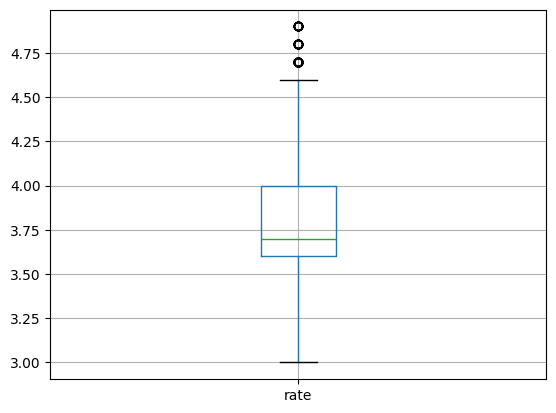

In [ ]:
import matplotlib.pyplot as plt
boxplot = df.boxplot(['rate'])
plt.show()

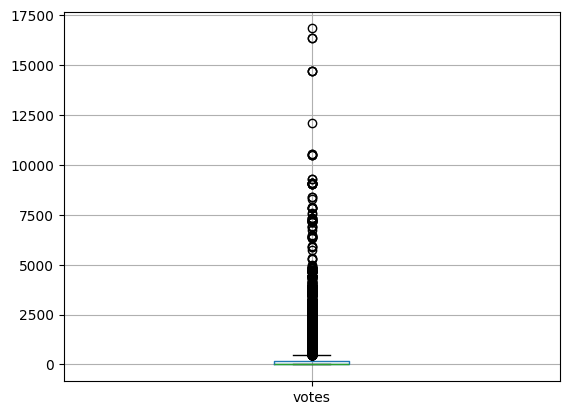

In [ ]:
boxplot = df.boxplot(['votes'])
plt.show()

In [ ]:
df['approx_cost(for two people)'].value_counts()

,count
approx_cost(for two people),
300,2248
400,1914
500,1417
200,1401
600,1102
250,854
800,608
700,560
350,558


In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)


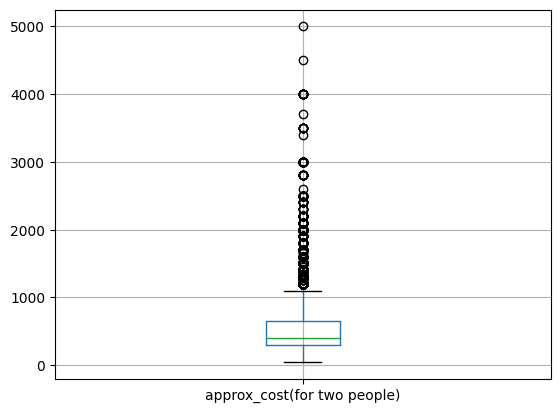

In [ ]:
boxplot = df.boxplot(['approx_cost(for two people)'])
plt.show()

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14175 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         14175 non-null  object 
 1   online_order                 14175 non-null  object 
 2   book_table                   14175 non-null  object 
 3   rate                         14175 non-null  float64
 4   votes                        14175 non-null  int64  
 5   location                     14175 non-null  object 
 6   rest_type                    14175 non-null  object 
 7   cuisines                     14175 non-null  object 
 8   approx_cost(for two people)  14175 non-null  float64
 9   listed_in(type)              14175 non-null  object 
 10  sell_beverages               14175 non-null  object 
 11  sell_chinese_food            14175 non-null  object 
 12  sell_thai_food               14175 non-null  object 
 13  sell_indian_food     

In [ ]:
df['listed_in(type)'].value_counts()

,count
listed_in(type),
Delivery,7113
Dine-out,4903
Desserts,965
Cafes,481
Drinks & nightlife,289
Buffet,231
Pubs and bars,193


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
label_encoding = preprocessing.LabelEncoder()

df['sell_beverages'] = label_encoding.fit_transform(df['sell_beverages'])

df['sell_chinese_food'] = label_encoding.fit_transform(df['sell_chinese_food'])

df['sell_thai_food'] = label_encoding.fit_transform(df['sell_thai_food'])

df['sell_indian_food'] = label_encoding.fit_transform(df['sell_indian_food'])

df['sell_mediterranean_food'] = label_encoding.fit_transform(df['sell_mediterranean_food'])

df['sell_fast_food'] = label_encoding.fit_transform(df['sell_fast_food'])

df['sell_desserts'] = label_encoding.fit_transform(df['sell_desserts'])

df['online_order'] = label_encoding.fit_transform(df['sell_desserts'])

df['book_table'] = label_encoding.fit_transform(df['sell_desserts'])

In [ ]:
encode2 = OneHotEncoder()
df_prof_enc = pd.DataFrame(encode2.fit_transform(df[['listed_in(type)']]).toarray(),columns=encode2.get_feature_names_out())
df=df.reset_index()
df=pd.concat([df,df_prof_enc], axis=1)

In [ ]:
df = df.drop('listed_in(type)', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14175 entries, 0 to 14174
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               14175 non-null  int64  
 1   name                                14175 non-null  object 
 2   online_order                        14175 non-null  int64  
 3   book_table                          14175 non-null  int64  
 4   rate                                14175 non-null  float64
 5   votes                               14175 non-null  int64  
 6   location                            14175 non-null  object 
 7   rest_type                           14175 non-null  object 
 8   cuisines                            14175 non-null  object 
 9   approx_cost(for two people)         14175 non-null  float64
 10  sell_beverages                      14175 non-null  int64  
 11  sell_chinese_food                   14175

In [ ]:
from sklearn.preprocessing import RobustScaler
scaling = RobustScaler()

In [ ]:
df['rate'] = scaling.fit_transform(df[['rate']])
df['votes'] = scaling.fit_transform(df[['votes']])
df['approx_cost(for two people)'] = scaling.fit_transform(df[['approx_cost(for two people)']])

In [ ]:
df = df.reset_index()
df = df.drop('index', axis = 1)
df = df.drop('level_0', axis = 1)

In [ ]:
df['cuisines'] = df['cuisines'].str.replace(',',' ')

In [ ]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),sell_beverages,...,sell_mediterranean_food,sell_fast_food,sell_desserts,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Faasos,0,0,0.25,0.323077,Vasanth Nagar,Delivery,North Indian Biryani Fast Food,0.285714,0,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Khanapur Express,0,0,0.00,-0.194872,JP Nagar,Quick Bites,North Indian Rajasthani,0.285714,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Russh Gastropub,0,0,1.25,6.364103,Church Street,Pub,Continental Italian Burger,2.000000,0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Natural Mumbai Kulfi,1,1,-0.50,-0.153846,BTM,Dessert Parlor,Ice Cream,-0.771429,0,...,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Chai Resto,0,0,-0.50,-0.158974,Bellandur,Quick Bites,Fast Food Tea,-0.571429,1,...,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14170,Sri Vasavi Restaurant,0,0,-0.25,-0.041026,Bellandur,Quick Bites,Chinese Biryani,-0.428571,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14171,Hoppipola,0,0,1.50,8.564103,Church Street,Lounge,Continental Mediterranean European,2.571429,0,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14172,Ghar Ki Rasoi,0,0,0.00,0.061538,Bellandur,Casual Dining,North Indian,0.285714,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14173,Ice Cubes,1,1,-1.75,-0.112821,Indiranagar,Quick Bites,Fast Food Desserts Beverages,-0.285714,1,...,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df_gap = df['location'] + " " + df['rest_type'] + " " +df['cuisines']
df_gap

,0
0,Vasanth Nagar Delivery North Indian Biryani ...
1,JP Nagar Quick Bites North Indian Rajasthani
2,Church Street Pub Continental Italian Burger
3,BTM Dessert Parlor Ice Cream
4,Bellandur Quick Bites Fast Food Tea
...,...
14170,Bellandur Quick Bites Chinese Biryani
14171,Church Street Lounge Continental Mediterranea...
14172,Bellandur Casual Dining North Indian
14173,Indiranagar Quick Bites Fast Food Desserts B...


In [ ]:
tfidf = TfidfVectorizer()
tf_matrix = tfidf.fit_transform(df_gap)

In [ ]:
name = df['name']


In [ ]:
dftest = df
dftest = dftest.drop(['name','location', 'rest_type', 'cuisines'], axis = 1)
dftest

,online_order,book_table,rate,votes,approx_cost(for two people),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,0,0,0.25,0.323077,0.285714,0,0,0,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0,0.00,-0.194872,0.285714,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,1.25,6.364103,2.000000,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,-0.50,-0.153846,-0.771429,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,-0.50,-0.158974,-0.571429,1,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14170,0,0,-0.25,-0.041026,-0.428571,0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14171,0,0,1.50,8.564103,2.571429,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14172,0,0,0.00,0.061538,0.285714,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14173,1,1,-1.75,-0.112821,-0.285714,1,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
tfidf_feature_names = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(tf_matrix.toarray(), columns=tfidf_feature_names)

In [ ]:
df_gap = pd.concat([dftest.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

In [ ]:
df_gap.head()

,online_order,book_table,rate,votes,approx_cost(for two people),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,...,vasanth,vegan,vietnamese,vijay,west,whitefield,wilson,wraps,yelahanka,yeshwantpur
0,0,0,0.25,0.323077,0.285714,0,0,0,1,0,...,0.648594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.00,-0.194872,0.285714,0,0,0,1,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1.25,6.364103,2.000000,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,-0.50,-0.153846,-0.771429,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,-0.50,-0.158974,-0.571429,1,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import TruncatedSVD
n_components = 100

svd = TruncatedSVD(n_components=n_components)
features_reduced = svd.fit_transform(df_gap)

features_reduced

array([[ 4.64546107e-01,  6.17916151e-01,  1.17809229e+00, ...,
         1.25471152e-01,  7.40494100e-03,  1.39325184e-01],
       [-8.49158484e-02,  6.19193678e-01,  1.09924547e+00, ...,
        -3.44636855e-02,  4.24330290e-02, -6.60390401e-02],
       [ 6.69530924e+00,  1.01956621e+00, -6.36034414e-01, ...,
         8.04095530e-03, -1.06051788e-01, -2.56736336e-02],
       ...,
       [ 1.73765570e-01,  6.15666769e-01,  1.09506053e+00, ...,
        -6.77139440e-04, -2.71339146e-03,  3.46985001e-03],
       [-2.45455693e-01, -3.07696795e-01,  1.33637650e+00, ...,
         9.67405857e-04, -5.93135087e-02, -7.37449805e-03],
       [ 1.17857757e+00, -1.38568459e-01,  6.49447466e-01, ...,
        -4.42887054e-03, -2.80578121e-02, -7.16849615e-03]])

In [ ]:
cos_sim_data = pd.DataFrame(cosine_similarity(features_reduced))

In [ ]:
df_gap.set_index(name, inplace=True)

In [ ]:
indices = pd.Series(df_gap.index)
indices[:5]

,name
0,Faasos
1,Khanapur Express
2,Russh Gastropub
3,Natural Mumbai Kulfi
4,Chai Resto


In [ ]:
def recommendations(name, cos_sim):
    recommended_rest = []

    # Mendapatkan indeks dari nama restoran
    idx = indices[indices == name].index[0]

    # Mengambil skor kesamaan dan mengurutkan
    score_series = pd.Series(cos_sim[idx]).sort_values(ascending=False)

    # Mendapatkan indeks untuk 5 rekomendasi teratas
    top_5_indexes = list(score_series.iloc[1:6].index)

    # Menambahkan nama restoran yang direkomendasikan
    for i in top_5_indexes:
        recommended_rest.append(df['name'].iloc[i])

    return recommended_rest

In [ ]:
recommendations('Fire And Ice', cos_sim_data)

['Crepe Nation', 'Crepe Nation', "Mama's Cuisine", 'FrostBite', 'I-Scoop Cafe']

In [ ]:
print(df[df["name"].isin(['Crepe Nation', 'Crepe Nation', "Mama's Cuisine", 'FrostBite', 'I-Scoop Cafe'])])

                 name  online_order  book_table  rate     votes  \
1158   Mama's Cuisine             1           1  0.00 -0.194872   
3998     Crepe Nation             1           1  0.25 -0.133333   
4419        FrostBite             1           1 -0.50 -0.117949   
5592     I-Scoop Cafe             1           1  0.00 -0.194872   
8300     I-Scoop Cafe             1           1  0.00 -0.194872   
10476       FrostBite             1           1 -0.50 -0.117949   
12870    Crepe Nation             1           1  0.25 -0.133333   

                    location                    rest_type  \
1158            Bommanahalli                     Delivery   
3998         South Bangalore                   Food Truck   
4419   Koramangala 5th Block  Dessert Parlor, Quick Bites   
5592               Jayanagar                  Quick Bites   
8300               Jayanagar                  Quick Bites   
10476  Koramangala 5th Block  Dessert Parlor, Quick Bites   
12870        South Bangalore        

In [ ]:
recommendations('Fai Dang', cos_sim_data)

['One Night In Bangkok',
 'One Night In Bangkok',
 'Kitchen On Table',
 'Kitchen On Table',
 'Cafe Noir']

In [ ]:
print(df[df["name"].isin(['One Night In Bangkok',
 'Kitchen On Table',
 'Cafe Noir'])])

                       name  online_order  book_table  rate      votes  \
618               Cafe Noir             0           0  0.00  -0.194872   
1589              Cafe Noir             0           0  0.00  -0.194872   
1632              Cafe Noir             0           0  0.00  -0.194872   
6322   One Night In Bangkok             0           0  0.00  -0.194872   
7101       Kitchen On Table             0           0  1.50   3.861538   
7115       Kitchen On Table             0           0  0.75   0.097436   
7189       Kitchen On Table             0           0  0.75   0.087179   
7788       Kitchen On Table             0           0  0.75   0.097436   
8702              Cafe Noir             0           0  1.25  10.471795   
9124   One Night In Bangkok             0           0  0.00  -0.194872   
10655             Cafe Noir             0           0  1.00   5.651282   
12469             Cafe Noir             0           0  1.00   5.892308   
12968      Kitchen On Table           

In [ ]:
recommendations('Sri Vasavi Restaurant', cos_sim_data)

["Nawab's Kitchen",
 'Sri Krishna Kitchen',
 'New Desi Paratha Point',
 'Bellandur Kitchen',
 'Tandoori Ghar']

In [ ]:
print(df[df["name"].isin(["Nawab's Kitchen",
 'Sri Krishna Kitchen',
 'New Desi Paratha Point',
 'Bellandur Kitchen',
 'Tandoori Ghar'])])

                         name  online_order  book_table  rate     votes  \
8         Sri Krishna Kitchen             0           0 -0.25 -0.082051   
411             Tandoori Ghar             0           0  0.00 -0.194872   
1427      Sri Krishna Kitchen             0           0 -0.25  0.015385   
1432      Sri Krishna Kitchen             0           0 -0.25 -0.082051   
1616      Sri Krishna Kitchen             0           0 -0.25  0.020513   
2861      Sri Krishna Kitchen             0           0 -0.25  0.020513   
3333   New Desi Paratha Point             0           0  0.00 -0.194872   
4983        Bellandur Kitchen             0           0 -0.75 -0.107692   
7725          Nawab's Kitchen             0           0  0.00 -0.194872   
10418     Sri Krishna Kitchen             0           0 -0.25  0.015385   

        location      rest_type                        cuisines  \
8      Bellandur    Quick Bites           North Indian  Chinese   
411    Bellandur  Casual Dining  North I